In [16]:
#useful commands for plotting
#Modules to import
import os
import subprocess
import numpy as np
from scipy import interpolate, integrate
import natpy as nat
import matplotlib.pyplot as plt
import camb
%config InlineBackend.figure_format = 'svg' #This backend works magically clear plots
#%config InlineBackend.figure_format = 'png' #But to show on github I need to use png - 
                                            #or keep svg and use the publicnbconverter
#For \text command
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['figure.dpi']= 72.0 #For svg
#plt.rcParams['figure.dpi']= 216.0 #For svg
plt.rcParams['lines.linewidth'] = 2.3
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["font.size"] = 16
plt.rcParams["axes.xmargin"] = 0
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = (1,1,1,0) #For transparent plot background
plt.rcParams["grid.color"] = "#dddddd"
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "none"
from num2tex import num2tex

In [17]:
#Set up parent directory to be whereever the notebook is being run
import os
parent_path=str(os.getcwd())

Before plotting, let's generate all the data we need, so that we can save some time not running the whole thing again if it's just the plot itself that needs some adjusting. In this notebook, I take the mass ranges: 10−26 eV , 10−29 eV , 10−32 eV ; 𝑓ax ranges: 1e-3, 1e-1, 0.5, 1.0; get_scalar_cls being T, F (F is for generating the transfer function with a denser (user-specified) k-sampling. Due to CAMB's internal structure, this is suppressed (i.e. we get a sparser 𝑘 sampling than we input) under get_scalar_cls being T.

This choice is motivated by that we would like to see the impacts of the bug, which are most observable for masses with a_osc ~ a_eq, when the axion fraction as a function of time starts to become non-negligible as we leave radiation-domination, and the axion perturbations exhibit the most oscillatory behavior.

## Cls TT masas y fracciones del axión diferentes
Notebook buffix_compare

In [9]:
#Dimensionless hubble from the params.ini file
h = 67.31/100.00

#Pre-set the parameters I might not need to modify for this cell - mind the order
#l_max_scalar = 2550
transfer_k_per_logint = 100
l_max_scalar = 5000

#THE FOLLOWING ARE THE RANGES OF VARIABLES THAT ARE ACTUALLY VARYING.
#We can make a smaller list to check if it works first
get_scalar_cls_list = ['T', 'F']  # #use string here to put in the call command
axfrac_list = ['1.e-3', '0.1', '0.5', '1.0']  # use string here to put in the call command
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list]
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp]
m_ax_list = [1.e-22, 1.e-24, 1.e-26, 1.e-28]
m_ax_label_list = [str(m_ax).replace('.', 'd') for m_ax in m_ax_list]
kmax_list = [3, 1, 0.3, 0.1]


 


print(axfrac_label_list)

m_ax_list


['1e-3', '0d1', '0d5', '1d0']


[1e-22, 1e-24, 1e-26, 1e-28]

In [18]:
# Generate data
#only cls 

for get_scalar_cls in get_scalar_cls_list:
    for axfrac in axfrac_list:
        axfrac_label = axfrac_label_list[axfrac_list.index(axfrac)]
        for k, m_ax_label in enumerate(m_ax_label_list):
            print(f'./camb params.ini 1 {get_scalar_cls} 2 {l_max_scalar} 3 {transfer_k_per_logint} 4 {kmax_list[k]/h} 5 {m_ax_list[k]} 6 {axfrac}')
            subprocess.call(f'./camb params.ini 1 {get_scalar_cls} 2 {l_max_scalar} 3 {transfer_k_per_logint} 4 {kmax_list[k]/h} 5 {m_ax_list[k]} 6 {axfrac}', shell=True)

            if get_scalar_cls == 'T':
                # Move scalar_cls files
                subprocess.call(f'mv test_scalCls.dat postdebug_scalCls_max={m_ax_label}eV_axfrac={axfrac_label}.dat', shell=True)

./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-24 6 1
(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb par

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-24 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-24 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-24 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-24 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-24 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-24 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-24 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


/tmp/ipykernel_3135/2688845895.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3, 1, figsize=(7, 10), sharex=True)


[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.5

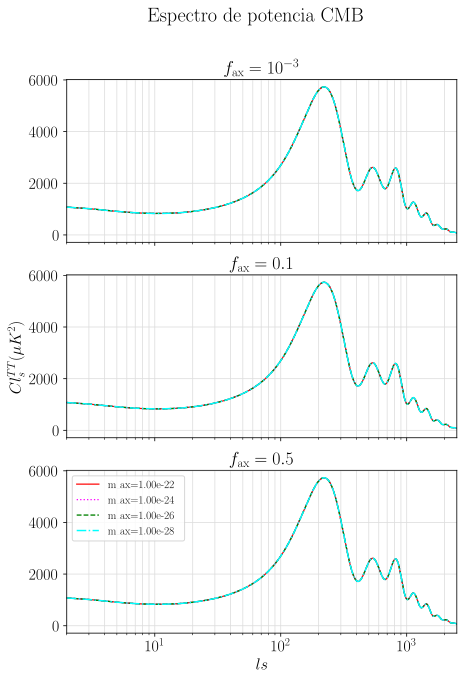

In [6]:
#datos notebook bugfix_compare


import matplotlib.pyplot as plt


fig, axs = plt.subplots(3, 1, figsize=(7, 10), sharex=True)
colors = ['red', 'magenta', 'green', 'cyan'] 
line_styles = ['solid', 'dotted', 'dashed', 'dashdot']
lw=[1.2,1.3,1.3,1.5]

for i in range(len(axfrac_list) - 1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
    
    axs[i].grid(which='both')


    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]

        # Cargar los datos de los espectros
        l_after, TT_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat' % (m_ax_label, axfrac_label),
                                       usecols=(0, 1), unpack=True)
        
        print(TT_after)
        print('postdebug_scalCls_max=%seV_axfrac=%s.dat')
        
        
        # Graficar los espectros 
        if i < 2:
            axs[i].plot(l_after, TT_after, lw=lw[j], color=colors[j], linestyle=line_styles[j])
        else:
            # Graficar el espectro con la etiqueta correspondiente al valor de la masa del axión en el último subplot
            axs[i].plot(l_after, TT_after,lw=lw[j],color=colors[j], linestyle=line_styles[j], label=f'm_ax={m_ax_list[j]:.2e}')
            
      

# axs[i].set_title('TT')


fig.suptitle('Espectro de potencia CMB', fontsize=20)


axs[i].set_xscale('log')

axs[1].set_ylabel('$Cl_s^{TT} (\mu K^2$)')
axs[2].set_xlabel('$ls$')

axs[0].set_xlim([2,2500])
axs[1].set_xlim([2,2500])
axs[2].set_xlim([2,2500])

#para cada fraccion de axion
axs[0].set_title(r'$f_\text{ax}=' + '10^{-3}' + '$', fontsize=18)
axs[1].set_title(r'$f_\text{ax}=' + '0.1' + '$', fontsize=18)
axs[2].set_title(r'$f_\text{ax}=' + axfrac + '$', fontsize=18)


# Mostrar el gráfico
plt.legend(loc='upper left', fontsize='x-small')
plt.show()
plt.close()




### Fijando m_ax_list a un mismo valor $10e^{-26} / 10e^{-27}$

In [19]:
#Dimensionless hubble from the params.ini file
h = 67.31/100.00

#Pre-set the parameters I might not need to modify for this cell - mind the order
#l_max_scalar = 2550
transfer_k_per_logint = 100
l_max_scalar = 5000

#THE FOLLOWING ARE THE RANGES OF VARIABLES THAT ARE ACTUALLY VARYING.
#We can make a smaller list to check if it works first
get_scalar_cls_list = ['T', 'F']  # #use string here to put in the call command
#axfrac_list = ['0.02', '0.05', '0.1', '1.0'] # use string here to put in the call command
axfrac_list = ['0.01', '0.05', '0.5', '1']       #la uso cuando descomente  m_ax = 10e-27
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list]
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp]
m_ax_list = 1.e-27, 1.e-27, 1.e-27, 1.e-27          #valores del paper
kmax_list = [3, 1, 0.3, 0.1]                        #valores del notebook
#m_ax_list = [1.e-26] * len(axfrac_list)
m_ax_label_list = [str(m_ax).replace('.', 'd') for m_ax in m_ax_list]

In [20]:
# Generate data only cls 

for get_scalar_cls in get_scalar_cls_list:
    for axfrac in axfrac_list:
        axfrac_label = axfrac_label_list[axfrac_list.index(axfrac)]
        for k, m_ax_label in enumerate(m_ax_label_list):
            print(f'./camb params.ini 1 {get_scalar_cls} 2 {l_max_scalar} 3 {transfer_k_per_logint} 4 {kmax_list[k]/h} 5 {m_ax_list[k]} 6 {axfrac}')
            subprocess.call(f'./camb params.ini 1 {get_scalar_cls} 2 {l_max_scalar} 3 {transfer_k_per_logint} 4 {kmax_list[k]/h} 5 {m_ax_list[k]} 6 {axfrac}', shell=True)

            if get_scalar_cls == 'T':
                # Move scalar_cls files
                subprocess.call(f'mv test_scalCls.dat postdebug_scalCls_max={m_ax_label}eV_axfrac={axfrac_label}.dat', shell=True)

./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-27 6 0.01
(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb 

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-27 6 0.01
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 0.01
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-27 6 0.05
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-27 6 0.05
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-27 6 0.05
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 0.05
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-27 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-27 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-27 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-27 6 0.01
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-27 6 0.01
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-27 6 0.01
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 0.01
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-27 6 0.05
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-27 6 0.05
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-27 6 0.05
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 0.05
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-27 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-27 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-27 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


/tmp/ipykernel_3135/4052925303.py:13: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3, 1, figsize=(8.5, 10), sharex=True)


[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.58314521e+02 ... 1.80152827e-01
 1.79726274e-01 1.79299701e-01]
postdebug_scalCls_max=%seV_axfrac=%s.dat
[1.07689253e+03 1.01718226e+03 9.5

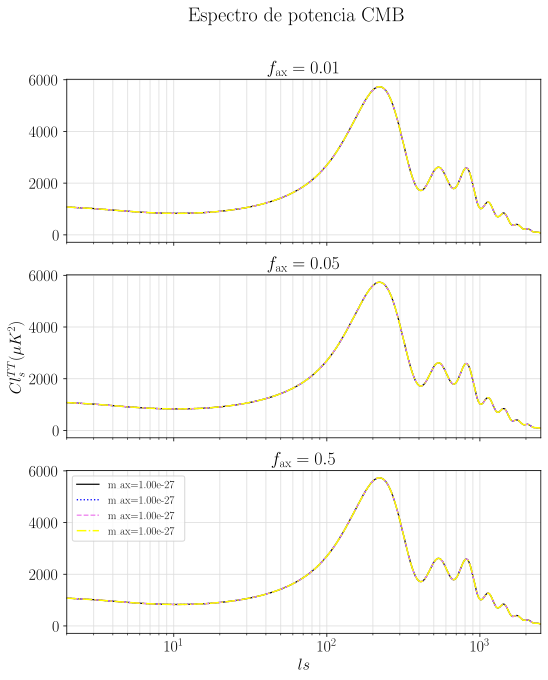

In [21]:
# m_ax = 10e-26

# m_ax = 10-27


import matplotlib.pyplot as plt

# Variables y configuraciones previas
# ...



fig, axs = plt.subplots(3, 1, figsize=(8.5, 10), sharex=True)
colors = ['black', 'blue', 'violet', 'yellow'] 
line_styles = ['solid', 'dotted', 'dashed', 'dashdot']
lw=[1.2,1.3,1.3,1.5]

for i in range(len(axfrac_list) - 1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
    
    axs[i].grid(which='both')


    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]

        # Cargar los datos de los espectros
        l_after, TT_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat' % (m_ax_label, axfrac_label),
                                       usecols=(0, 1), unpack=True)
        print(TT_after)
        print('postdebug_scalCls_max=%seV_axfrac=%s.dat')
        
        
        # Graficar los espectros 
        if i < 2:
            axs[i].plot(l_after, TT_after, lw=lw[j], color=colors[j], linestyle=line_styles[j])
        else:
            # Graficar el espectro con la etiqueta correspondiente al valor de la masa del axión en el último subplot
            axs[i].plot(l_after, TT_after,lw=lw[j],color=colors[j], linestyle=line_styles[j], label=f'm_ax={m_ax_list[j]:.2e}')
            
            # Establecer escala logarítmica en el eje y
axs[i].set_xscale('log')
       
    #Ajustar etiquetas y leyendas en el último subplot
# ...

fig.suptitle('Espectro de potencia CMB', fontsize=20)

axs[1].set_ylabel('$Cl_s^{TT} (\mu K^2$)')
axs[2].set_xlabel('$ls$')
axs[0].set_xlim([2,2500])
axs[1].set_xlim([2,2500])
axs[2].set_xlim([2,2500])

axs[0].set_title(r'$f_\text{ax}=' + '0.01' + '$', fontsize=18)
axs[1].set_title(r'$f_\text{ax}=' + '0.05' + '$', fontsize=18)
axs[2].set_title(r'$f_\text{ax}=' + '0.5' + '$', fontsize=18)


#graficos para las diferencias fraccionales


# Mostrar el gráfico
plt.legend(loc='upper left', fontsize='x-small')
plt.show()
plt.close()

## $Cls$ para  $m_ax = 5e^{-27}$ y axfrac_list$ = [1,1,1,1]$

In [30]:
#Dimensionless hubble from the params.ini file   corregir 
h = 67.31/100.00

#Pre-set the parameters I might not need to modify for this cell - mind the order
#l_max_scalar = 2550
transfer_k_per_logint = 100
l_max_scalar = 5000

#THE FOLLOWING ARE THE RANGES OF VARIABLES THAT ARE ACTUALLY VARYING.
#We can make a smaller list to check if it works first
get_scalar_cls_list = ['T', 'F']  # #use string here to put in the call command
#axfrac_list = ['1.e-3', '0.1', '0.5', '1.0']  # use string here to put in the call command
axfrac_list = ['1','1','1','1']
axfrac_label_list_temp = [str(axfrac_item).replace('.e', 'e') for axfrac_item in axfrac_list]
axfrac_label_list = [str(axfrac_item).replace('.', 'd') for axfrac_item in axfrac_label_list_temp]
m_ax_list = [1.e-25, 1.e-26, 5.e-27, 1.e-27]
m_ax_label_list = [str(m_ax).replace('.', 'd') for m_ax in m_ax_list]
kmax_list = [3, 1, 0.3, 0.1]

In [31]:
# Generate data
for get_scalar_cls in get_scalar_cls_list:
    for axfrac in axfrac_list:
        axfrac_label = axfrac_label_list[axfrac_list.index(axfrac)]
        for k, m_ax_label in enumerate(m_ax_label_list):
            print(f'./camb params.ini 1 {get_scalar_cls} 2 {l_max_scalar} 3 {transfer_k_per_logint} 4 {kmax_list[k]/h} 5 {m_ax_list[k]} 6 {axfrac}')
            subprocess.call(f'./camb params.ini 1 {get_scalar_cls} 2 {l_max_scalar} 3 {transfer_k_per_logint} 4 {kmax_list[k]/h} 5 {m_ax_list[k]} 6 {axfrac}', shell=True)

            if get_scalar_cls == 'T':
                # Move scalar_cls files
                subprocess.call(f'mv test_scalCls.dat postdebug_scalCls_max={m_ax_label}eV_axfrac={axfrac_label}.dat', shell=True)

./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb par

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-26 6 1


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 5e-27 6 1
(w0, wa)

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-25 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-26 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 5e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-27 6 1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


/tmp/ipykernel_3135/3791689472.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(4, 1, figsize=(7, 10), sharex=True)


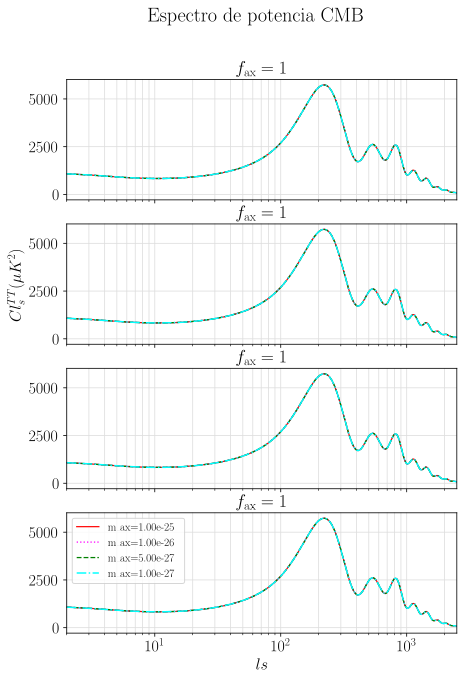

In [32]:
import matplotlib.pyplot as plt

# Variables y configuraciones previas
# ...



fig, axs = plt.subplots(4, 1, figsize=(7, 10), sharex=True)
colors = ['red', 'magenta', 'green', 'cyan'] 
line_styles = ['solid', 'dotted', 'dashed', 'dashdot']
lw=[1.2,1.3,1.3,1.5]

for i in range(len(axfrac_list)):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
    
    axs[i].grid(which='both')


    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]

        # Cargar los datos de los espectros
        l_after, TT_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat' % (m_ax_label, axfrac_label),
                                       usecols=(0, 1), unpack=True)
        
        
        # Graficar los espectros 
        if i < 3:
            axs[i].plot(l_after, TT_after, lw=lw[j], color=colors[j], linestyle=line_styles[j])
        else:
            # Graficar el espectro con la etiqueta correspondiente al valor de la masa del axión en el último subplot
            axs[i].plot(l_after, TT_after,lw=lw[j],color=colors[j], linestyle=line_styles[j], label=f'm_ax={m_ax_list[j]:.2e}')
            
      

# axs[i].set_title('TT')


fig.suptitle('Espectro de potencia CMB', fontsize=20)


axs[i].set_xscale('log')

axs[1].set_ylabel('$Cl_s^{TT} (\mu K^2$)')
axs[3].set_xlabel('$ls$')

axs[0].set_xlim([2,2500])
axs[1].set_xlim([2,2500])
axs[2].set_xlim([2,2500])

#para cada fraccion de axion
axs[0].set_title(r'$f_\text{ax}=' + '1' + '$', fontsize=18)
axs[1].set_title(r'$f_\text{ax}=' + '1' + '$', fontsize=18)
axs[2].set_title(r'$f_\text{ax}=' + '1' + '$', fontsize=18)
axs[3].set_title(r'$f_\text{ax}=' + '1' + '$', fontsize=18)

# Ajustar etiquetas y leyendas en el último subplot
# ...



# Mostrar el gráfico
plt.legend(loc='upper left', fontsize='x-small')
plt.show()
plt.close()